<a href="https://colab.research.google.com/github/TAUforPython/machinelearning/blob/main/example_PCA_ICA_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

from sklearn.decomposition import PCA, FastICA, KernelPCA


# Generate Data

Пусть
Y
0
,
Y
1
,
…
,
Y
n
 — независимые стандартные нормальные случайные величины, такие что
Y
i
∼
N
(
0
,
1
)
,
i
=
1
…
n
. Тогда распределение случайной величины
t
выглядит так и называется t-распределением с n-степенями свободы.

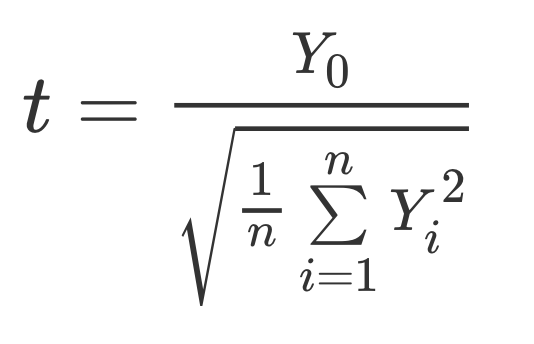

In [124]:
import matplotlib.pyplot as plt


def plot_samples(S, axis_list=None, color="steelblue"):
    plt.scatter(
        S[:, 0], S[:, 1], s=2, marker="o", zorder=10, c=color#, color=color, alpha=0.5
    )
    if axis_list is not None:
        for axis, color, label in axis_list:
            x_axis, y_axis = axis / axis.std()
            plt.quiver(
                (0, 0),
                (0, 0),
                x_axis,
                y_axis,
                zorder=11,
                width=0.01,
                scale=6,
                color=color,
                label=label,
            )

    plt.hlines(0, -5, 5, color="black", linewidth=0.5)
    plt.vlines(0, -3, 3, color="black", linewidth=0.5)
    plt.xlim(-5, 5)
    plt.ylim(-3, 3)
    plt.gca().set_aspect("equal")
    plt.xlabel("x")
    plt.ylabel("y")


## dataset #1 - ortho for PCA

In [162]:
# пересекающиеся множества

import random
n_samples = 500

Ya = np.random.uniform(-3, 3, n_samples)
Xa = np.random.uniform(-1,1,n_samples)
Ca = np.zeros(n_samples)
A = np.hstack((Xa,Ya))

Yb = np.random.uniform(-1, 1, n_samples)
Xb = np.random.uniform(-6,6,n_samples)
Cb = np.ones(n_samples)
B = np.hstack((Xb,Yb))

X = np.vstack((A,B))
Cy = np.hstack((Ca,Cb))

# original data
X = X.T

# Mix data
Rotation = np.array([[1/np.sqrt(2), 1/np.sqrt(2)], [-1/np.sqrt(2), 1/np.sqrt(2)]])  # Mixing matrix

Xmixed = np.dot(X, Rotation.T)  # Generate observations

## dataset #2 - nonortho for ICA

In [397]:
# пересекающиеся множества

import random
n_samples = 500

Ya = np.random.uniform(-3, 3, n_samples)
Xa = np.random.uniform(-1,1,n_samples)
Ca = np.zeros(n_samples)
A = np.hstack((Xa,Ya))

Yb = np.random.uniform(-1, 1, n_samples)
Xb = np.random.uniform(-6,6,n_samples)
Cb = np.ones(n_samples)
B = np.hstack((Xb,Yb))

X = np.vstack((A,B))
Cy = np.hstack((Ca,Cb))

# original data
X = X.T

# Mix data
Rotation = np.array([[13, 1], [-1, 2]])  # Mixing matrix

Xmixed = np.dot(X, Rotation.T)  # Generate observations

## dataset #3 - gaussian for ICA

In [425]:
# пересекающиеся множества

import random
n_samples = 500

Ya = np.random.normal(0, 3, n_samples)
Xa = np.random.uniform(-1,1,n_samples)
Ca = np.zeros(n_samples)
A = np.hstack((Xa,Ya))

Yb = np.random.normal(0, 1, n_samples)
Xb = np.random.uniform(-6,6,n_samples)
Cb = np.ones(n_samples)
B = np.hstack((Xb,Yb))

X = np.vstack((A,B))
Cy = np.hstack((Ca,Cb))

# original data
X = X.T

# Mix data
Rotation = np.array([[1, 1], [-1, 2]])  # Mixing matrix

Xmixed = np.dot(X, Rotation.T)  # Generate observations

## dataset #3 - dimention reduction - working

In [395]:
# пересекающиеся множества

import random
n_samples = 500

Ya = np.random.normal(-3, 3, n_samples)
Xa = np.random.uniform(-1,1,n_samples)
Ca = np.zeros(n_samples)
A = np.hstack((Xa,Ya))

Yb = np.random.normal(3, 3, n_samples)
Xb = np.random.uniform(-6,6,n_samples)
Cb = np.ones(n_samples)
B = np.hstack((Xb,Yb))

Yc = np.random.normal(4, 1, n_samples)
Xc = np.random.uniform(6,10,n_samples)
Cc = np.ones(n_samples)
C = np.hstack((Xc,Yc))

Yd = np.random.normal(-5, 1, n_samples)
Xd = np.random.uniform(-4,-6,n_samples)
Cd = np.ones(n_samples)
D = np.hstack((Xd,Yd))

X = np.vstack((A,B,C,D))
Cy = np.hstack((Ca,Cb,Cc,Cd))

# original data
X = X.T

#X = X.reshape(-1,2)
#Cy = Cy.reshape(-1,2)

# Mix data
Rotation = np.array([[1, 1, 1, 1], [-1, 1, 1, -1]])  # Mixing matrix
#Rotation = np.array([[1/np.sqrt(2), 1/np.sqrt(2)], [-1/np.sqrt(2), 1/np.sqrt(2)]])  # Mixing matrix

Xmixed = np.dot(X, Rotation.T)  # Generate observations

## dataset#4 - t-destribution

In [432]:
# T-destribution
n_samples = 10000

rng = np.random.RandomState(42)
X = rng.standard_t(1.5, size=(n_samples, 2))
X[:, 0] *= 2.0

Cb = np.ones(int(n_samples/2))
Ca = np.zeros(int(n_samples/2))
Cy = np.hstack((Ca,Cb))
# Mix data
Rotation = np.array([[0.5, 1], [1, 1]])  # Mixing matrix

Xmixed = np.dot(X, Rotation.T)  # Generate observations

# PCA + Kernel PCA

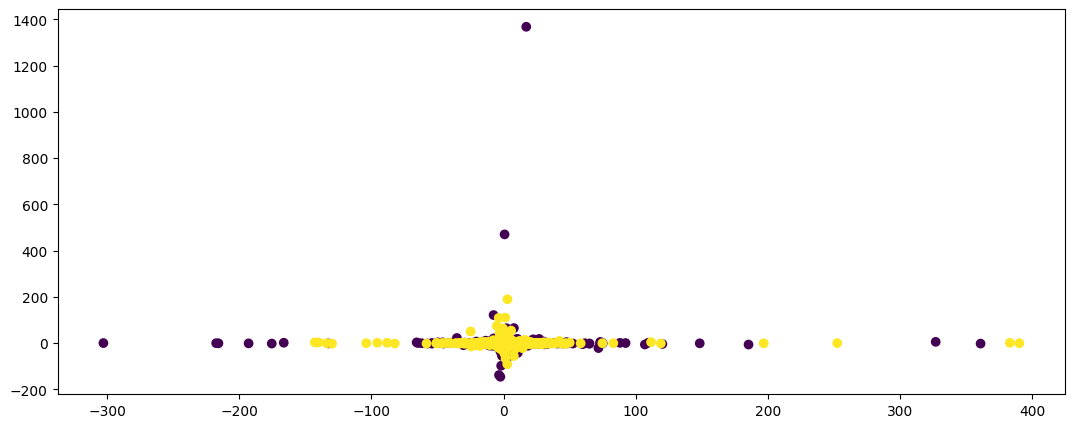

In [433]:
plt.scatter(X[:, 0], X[:, 1],c=Cy)

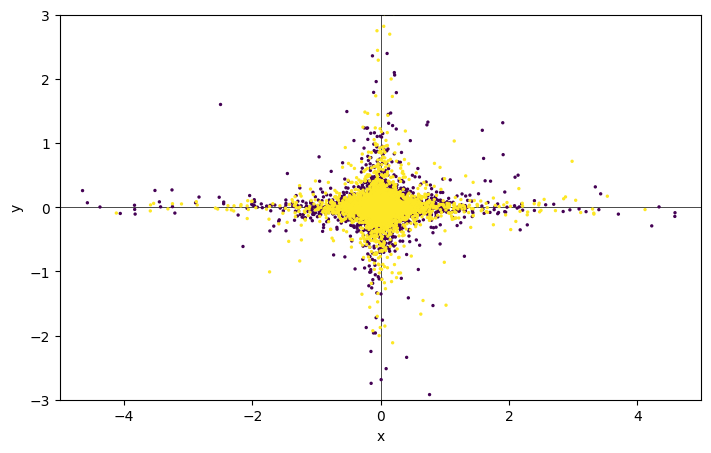

In [434]:
plot_samples(X / X.std(), color = Cy)

Text(0.5, 1.0, 'Observations')

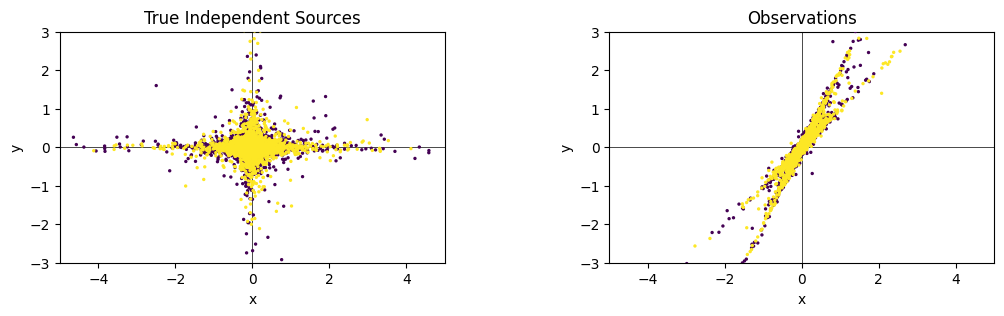

In [435]:
plt.rcParams["figure.figsize"] = (13,3)

plt.subplot(1, 2, 1)
plot_samples(X / X.std(), color=Cy)
plt.title("True Independent Sources")

plt.subplot(1, 2, 2)
plot_samples(Xmixed/ np.std(Xmixed), color=Cy)
plt.title("Observations")




In [436]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(Xmixed)
print(pca.explained_variance_ratio_)

[0.97908014 0.02091986]


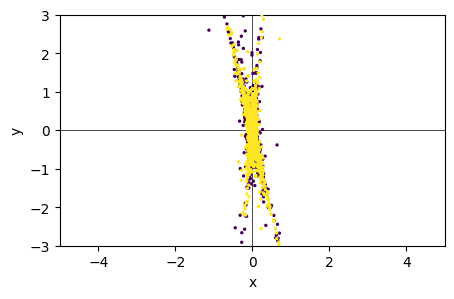

In [437]:
X_pca = np.fliplr(X_pca)
plot_samples(X_pca / X_pca.std(), color = Cy)

Text(0.5, 1.0, 'PCA components done')

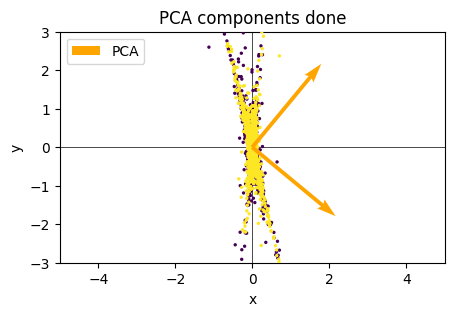

In [438]:
axis_list = [(pca.components_.T, "orange", "PCA")]
plot_samples(X_pca / np.std(X_pca), axis_list=axis_list, color=Cy)
legend = plt.legend(loc="upper left")
legend.set_zorder(100)

plt.title("PCA components done")

In [439]:
from scipy.stats import shapiro  #Shapiro test for non-gaussian measure
#it was published in 1965 by Samuel Sanford Shapiro and Martin Wilk

stat, p = shapiro(Xmixed)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.173, p=0.000
Sample does not look Gaussian (reject H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20000.
  res = hypotest_fun_out(*samples, **kwds)


In [440]:
from scipy.stats import kstest  # It is named after Andrey Kolmogorov and Nikolai Smirnov.

kstest(X, "norm", alternative='less')

KstestResult(statistic=array([0.21393973, 0.09450475]), pvalue=array([0.0000000e+00, 1.7564141e-78]), statistic_location=array([1.62802045, 1.90338369]), statistic_sign=array([-1., -1.]))

In [306]:
#kernel = ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘cosine’

kernel_pca = KernelPCA(
    n_components=2, kernel="linear", fit_inverse_transform=True, alpha=0.1
)

X_kernel_pca = kernel_pca.fit(Xmixed).transform(Xmixed)

ValueError: 'c' argument has 10000 elements, which is inconsistent with 'x' and 'y' with size 1000.

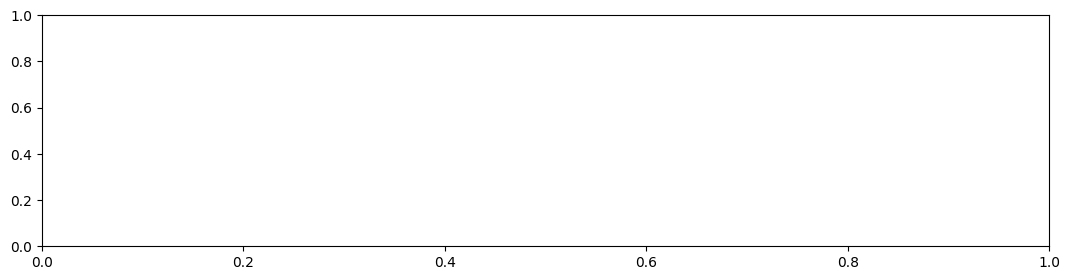

In [441]:
axis_list = [(pca.components_.T, "orange", "Kernel PCA")]
X_kernel_pca = np.fliplr(X_kernel_pca)
plot_samples(X_kernel_pca / np.std(X_kernel_pca), axis_list=axis_list, color=Cy)
legend = plt.legend(loc="upper left")
legend.set_zorder(100)

plt.title("Kernel PCA components done")

# ICA

In [442]:
#ica = FastICA(n_components=2, random_state=123, whiten="arbitrary-variance")
ica = FastICA(n_components=2, whiten="arbitrary-variance")

#X_ica = ica.fit(Xmixed).transform(Xmixed)  # Estimate the sources
X_ica = ica.fit_transform(Xmixed)  # Estimate the sources

Text(0.5, 1.0, 'ICA components done')

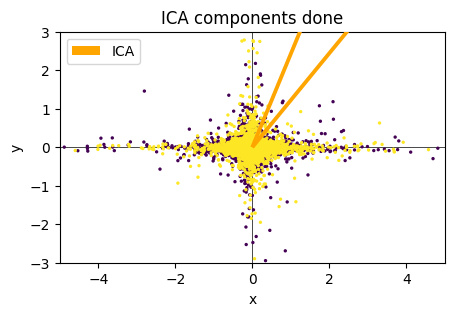

In [446]:
axis_list = [(ica.mixing_.T, "orange", "ICA")]
X_ica = np.fliplr(X_ica)
plot_samples(X_ica / np.std(X_ica), axis_list=axis_list, color=Cy)
legend = plt.legend(loc="upper left")
legend.set_zorder(100)

plt.title("ICA components done")

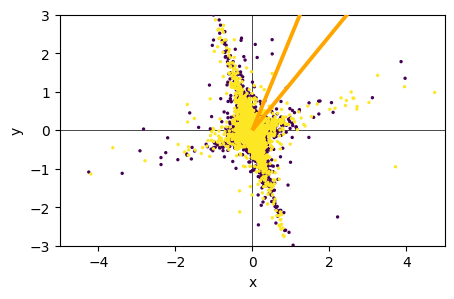

In [447]:
X_ica_pca = pca.fit_transform(X_ica)
X_ica_pca = np.fliplr(X_ica_pca)

plot_samples(X_ica_pca / np.std(X_ica_pca), axis_list=axis_list, color=Cy)

# Compare PCA and ICA

Text(0.5, 1.0, 'Observations')

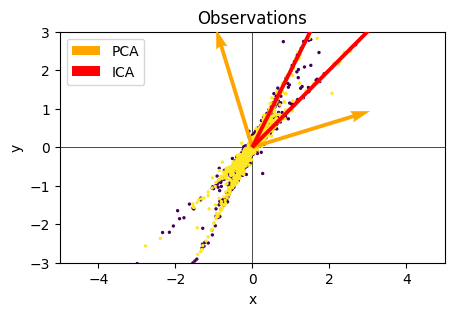

In [448]:
plt.rcParams["figure.figsize"] = (13,3)

axis_list = [(pca.components_.T, "orange", "PCA"), (ica.mixing_, "red", "ICA")]
plot_samples(Xmixed / np.std(Xmixed), axis_list=axis_list, color=Cy)
legend = plt.legend(loc="upper left")
legend.set_zorder(100)

plt.title("Observations")

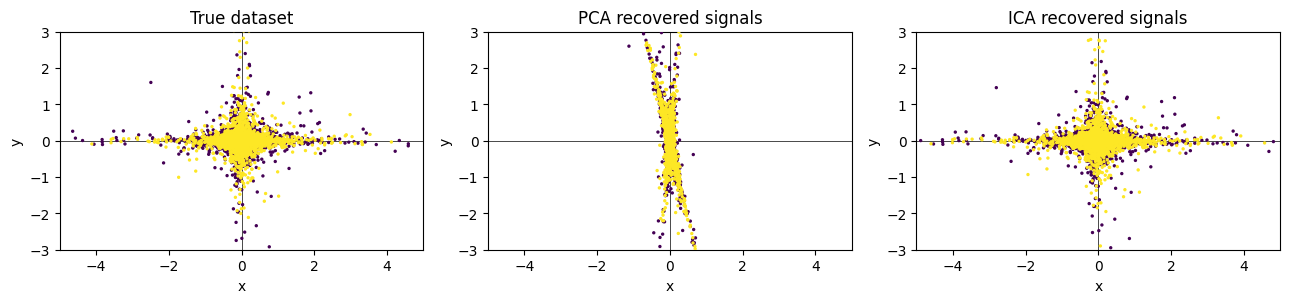

In [449]:
plt.rcParams["figure.figsize"] = (13,5)


plt.subplot(1, 3, 1)
plot_samples(X / X.std(),color=Cy)
plt.title("True dataset")


plt.subplot(1, 3, 2)
plot_samples(X_pca/ np.std(X_pca), color=Cy)
plt.title("PCA recovered signals")


plt.subplot(1, 3, 3)
plot_samples(X_ica / np.std(X_ica), color=Cy)
plt.title("ICA recovered signals")

plt.tight_layout()
plt.show()

# SNE

In [262]:
from time import time

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import NullFormatter

from sklearn import datasets, manifold

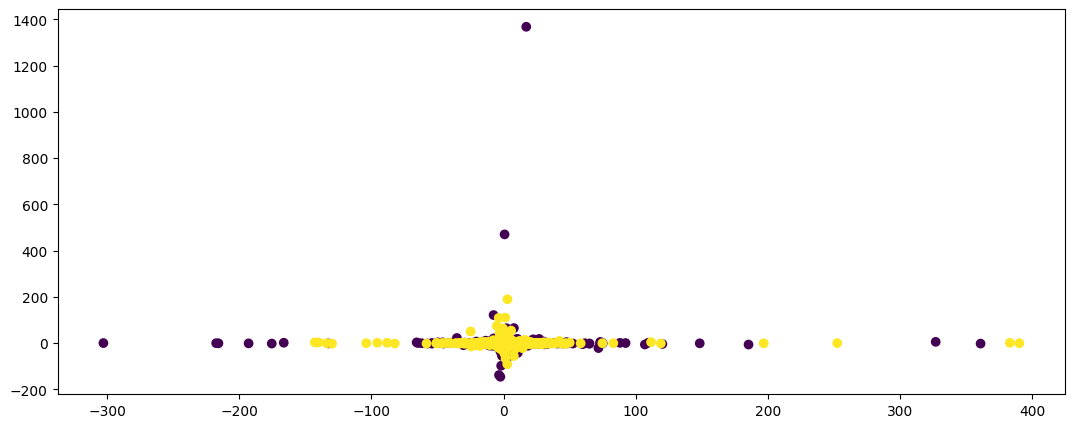

In [450]:
plt.scatter(X[:, 0], X[:, 1], c=Cy)

(-23.833934558249673,
 30.010056588978998,
 -15.594437459133353,
 102.00415729899554)

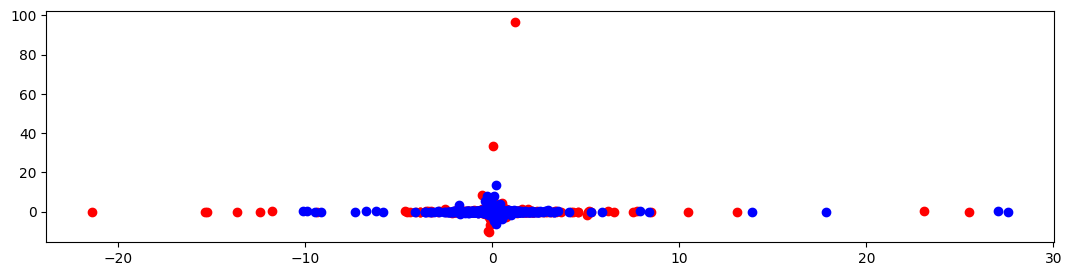

In [457]:
plt.rcParams["figure.figsize"] = (13,3)

red = Cy == 0
blue = Cy == 1

plt.scatter(X[red, 0], X[red, 1], c="r")
plt.scatter(X[blue, 0], X[blue, 1], c="b")
#ax.xaxis.set_major_formatter(NullFormatter())
#ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")


circles, perplexity=5 in 34 sec


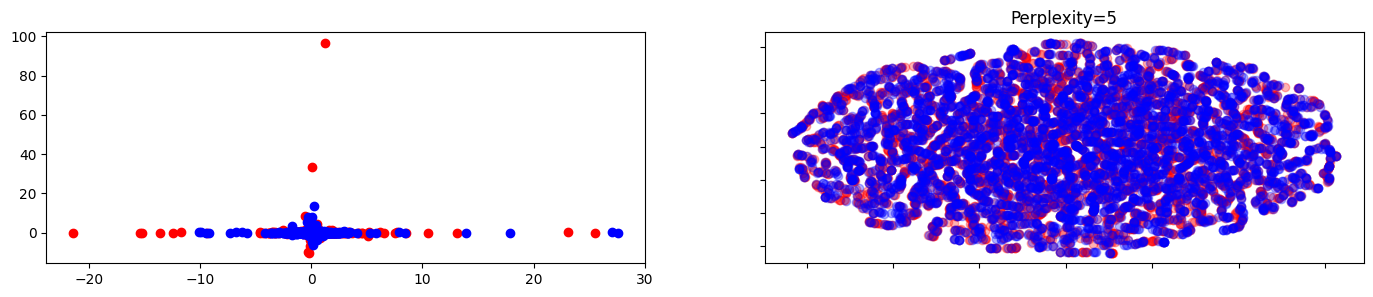

In [456]:
n_components = 2
#perplexities = [1, 5, 10, 15, 20, 30, 40, 50, 100]
perplexities = [5]

(fig, subplots) = plt.subplots(1, len(perplexities)+1, figsize=(17, 3))

red = Cy == 0
blue = Cy == 1

X = X/np.std(X)

ax = subplots[0]
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[blue, 0], X[blue, 1], c="b")
#ax.xaxis.set_major_formatter(NullFormatter())
#ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

for i, perplexity in enumerate(perplexities):
    ax = subplots[i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        max_iter=300,
    )
    Y = tsne.fit_transform(X/np.std(X))
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r", alpha=0.3)
    ax.scatter(Y[blue, 0], Y[blue, 1], c="b", alpha=0.3)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")
